    HSE06   HSE43   SOC06   SOC43
0  2.6259  3.2039  1.9276  2.6773
1  2.7827  3.4041  2.2932  3.1057
2  2.9199  3.5643  2.4926  3.3556
3  3.0375  3.7045  2.6587  3.5698
ediff_SOC is -0.2920999999999996


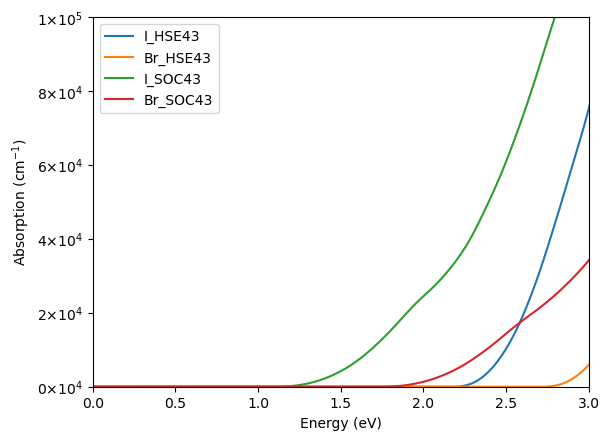

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import ScalarFormatter

materials = {
    "I_HSE43": {
        "dir" : 2.189, 
        "indir" :2.189, 
        "folder": "./primitive/I/HSE43/"
    },
    "Br_HSE43":{
        "dir": 2.73,
        "indir": 2.73,
        "folder": "./primitive/Br/HSE43/"
    },
    "I_SOC43":{
        "dir": 1.195,
        "indir": 1.195,
        "folder": "./primitive/I/SOC43/"
    },
    "Br_SOC43":{
        "dir": 1.806,
        "indir": 1.806,
        "folder": "./primitive/Br/SOC43/"
    },
}

fig, ax = plt.subplots()
indices = []

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    #the energy where first absorption more than ~
    index1 = np.argmax(data[:,1] > 2e4)
    index2 = np.argmax(data[:,1] > 4e4)
    index3 = np.argmax(data[:,1] > 6e4)
    index4 = np.argmax(data[:,1] > 8e4)
    indices.append([energy[index1], energy[index2], energy[index3], energy[index4]])
    ax.plot(energy, alpha_cm, label=material)
    

ax.set(xlim=[0,3],ylim = [0,1e5], xlabel='Energy (eV)', ylabel='Absorption (cm$^{-1}$)')
plt.legend()

# Custom formatter function to display labels as multiples of 10^4
def custom_formatter(x, pos):
    if x == 100000:
        return '1×10$^{5}$'  # Specific format for 100,000
    return f'{int(x/10000)}×10$^{4}$'

ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

# create indices DataFrame
indices = pd.DataFrame(indices)
indices = indices.T
indices.columns = ["HSE06", "HSE43", "SOC06", "SOC43"]
print(indices)

# calculate energy difference between different functionals
mean_HSE43 = indices.HSE43.mean()
mean_SOC43 = indices.SOC43.mean()
ediff_SOC = mean_SOC43 - mean_HSE43
print("ediff_SOC is", ediff_SOC)